In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/voice.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data['label'] = data['label'].replace(['male' , 'female'] , [0,1])

In [6]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [7]:
data.duplicated().sum()

2

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
x = data.drop('label', axis=1)
y = data['label']

In [11]:
y.value_counts()

label
0    1583
1    1583
Name: count, dtype: int64

In [12]:
import seaborn as sn

<Axes: xlabel='label', ylabel='count'>

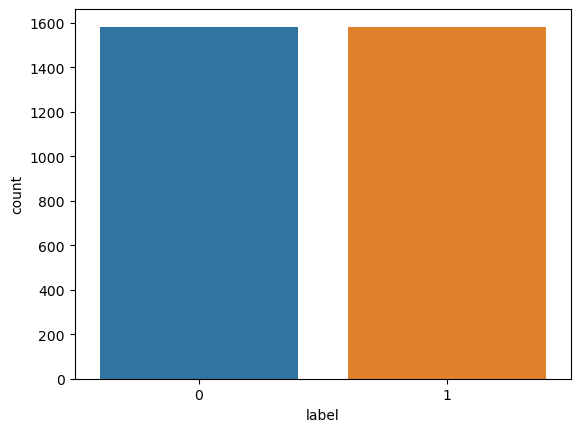

In [13]:
sn.countplot(x = 'label', data = data)

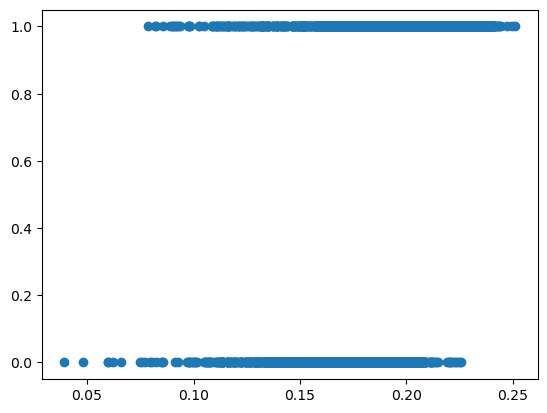

In [14]:
plt.scatter(x = data['meanfreq'], y = data['label'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain , xtest , ytrain ,ytest = train_test_split(x,y , random_state = 42 ,test_size = 0.30)

In [17]:
xtrain.shape

(2216, 20)

In [18]:
xtest.shape

(950, 20)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
ypred = lr.predict(xtest)

In [22]:
lr.score(xtest,ytest)

0.8252631578947368

In [23]:
from sklearn.metrics import confusion_matrix , classification_report , RocCurveDisplay

In [24]:
cm = confusion_matrix(ytest,ypred)
cm

array([[416,  77],
       [ 89, 368]], dtype=int64)

<Axes: >

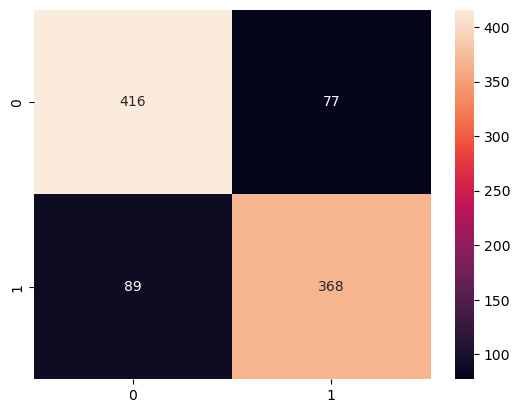

In [25]:
sn.heatmap(cm , annot = True , fmt = '.0f')

In [26]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       493
           1       0.83      0.81      0.82       457

    accuracy                           0.83       950
   macro avg       0.83      0.82      0.82       950
weighted avg       0.83      0.83      0.83       950



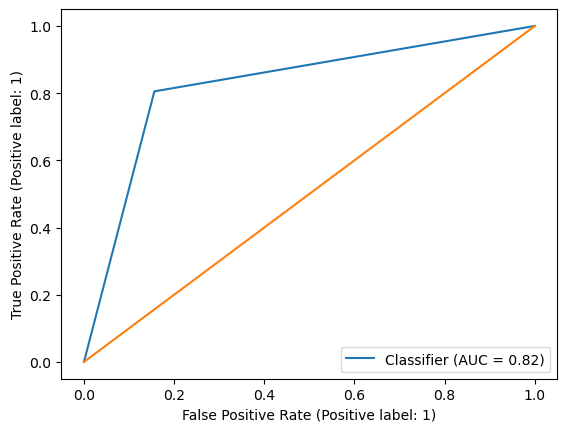

In [27]:
RocCurveDisplay.from_predictions(ytest, ypred)
plt.plot([0,1] , [0,1])

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
dtc.score(xtest,ytest)

0.9663157894736842

In [32]:
ypred2 = dtc.predict(xtest)
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       493
           1       0.96      0.97      0.97       457

    accuracy                           0.97       950
   macro avg       0.97      0.97      0.97       950
weighted avg       0.97      0.97      0.97       950



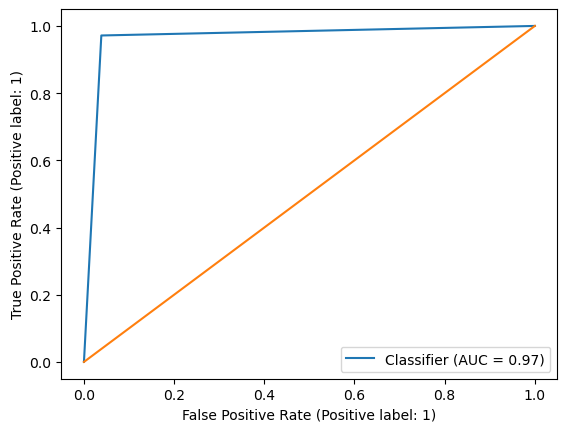

In [33]:
RocCurveDisplay.from_predictions(ytest, ypred2)
plt.plot([0,1] , [0,1])

In [34]:
import joblib as jb 

In [35]:
jb.dump(dtc , 'New_model')

['New_model']